# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#from __future__ import division

from numpy import inf

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$. <b>Hint:</b> The function input is a vector of labels and the function should return the entropy.

In [16]:
def entropy(y):
    ### WRITE YOUR CODE HERE ###
    y_size=y.size
    pi=[]
    for i in np.unique(y):
        i_size=int(np.array(np.where(y==i)).size)
        pi.append(i_size/y_size)

    logpi=np.log2(pi)
    np.where(logpi==-inf, 0,logpi)
    ent=-1*np.sum(pi*logpi)
    #print(ent)
    return ent

Check if your solution is correct:

In [17]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert round(entropy(np.array([1,1,0,0,1,1])),5) == round(0.9182957410812378,5)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [3,4,5]$, $y_{left} = [0,0,0]$ (for $x > t$) and
* $x_{right} = [1,2]$, $y_{right} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [18]:
def info_gain(x,y,t):
    ### WRITE YOUR CODE HERE ###
    left=x>t
    right=x<=t

    xleft= x[left]
    xright= x[right]
    yleft= y[left]
    yright= y[right]

    prob_left=xleft.size/x.size
    prob_right=xright.size/x.size
    
    ig=entropy(y)-prob_left*entropy(yleft)-prob_right*entropy(yright)
    
    return ig


Check if your solution is correct:

In [19]:
try:
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1) == 0.10803163030328733
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3) == 0.39581562117481894
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5) == 1.
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6) == 0.60998651623672373
    print("Testing successful.")
except:
    print("Tests failed.")

Tests failed.


In [20]:
try:
    assert round(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1),5) == round(0.10803163030328733,5)
    assert round(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3),5) == round(0.39581562117481894,5)
    assert round(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5),5) == 1.
    assert round(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6),5) == round(0.60998651623672373,5)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets. The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

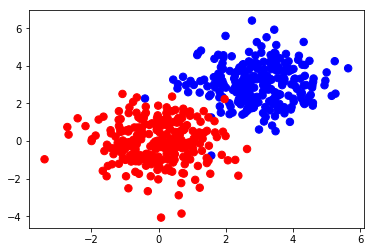

In [26]:
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###


# X1, Y1 = make_blobs(n_samples=250, n_features=2, centers=1, center_box=(0, 0))
# plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=['red'],s=55, edgecolor='k')
# X2, Y2 = make_blobs(n_samples=250, n_features=2, centers=1, center_box=(3, 3))
# plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=['blue'],s=55, edgecolor='k')
# plt.legend(['0','1'])


X1, Y1 = make_blobs(n_samples=250, n_features=2, centers=1, center_box=(0, 0))
X2, Y2 = make_blobs(n_samples=250, n_features=2, centers=1, center_box=(3, 3))

X= np.concatenate((X2,X1))
Y= np.concatenate((Y1,Y2+1))

pltclr=lambda x : "Red" if x==1 else "Blue"
plt.scatter(X[:, 0], X[:, 1], marker='o',s=55, c=[pltclr(i) for i in Y])

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [35]:
def find_best_split(x,y):
    ### WRITE YOUR CODE HERE ###
#    print("started")
    ig={}
    for i in x:
        ig[i]=info_gain(x,y,i)

    key, value = max(ig.items(), key=lambda x:x[1])
#    print(ig)

    return key

Check if your solution is correct:

In [36]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="figures/split.png" width="600"/>
* Which split would you prefer, and why?

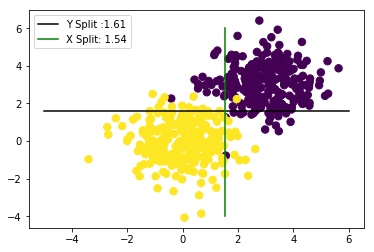

In [38]:
x_best = round(find_best_split(X[:,0],Y),2)
y_best = round(find_best_split(X[:,1],Y),2)

### WRITE YOUR CODE HERE ###



plt.scatter(X[:, 0], X[:, 1], marker='o',s=55, c=Y)
x = np.linspace(-5,6,100)
y = np.linspace(y_best,y_best,100)
plt.plot(x, y, '-r',c='black', label='Y Split :'+str(y_best))

x = np.linspace(x_best,x_best,100)
y = np.linspace(-4,6,100)
plt.plot(x, y, '-r', c='green', label='X Split: '+str(x_best))
plt.legend();

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf_tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="figures/dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

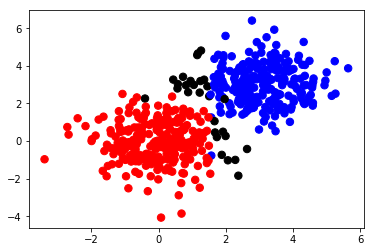

In [42]:
### WRITE YOUR CODE HERE ###
Test=clf_tree.predict(X)

#Result=[ Y[i]==Test[i] for i in range(len(Y)) ]
Result=[-1 if (Y[i]!=Test[i]) else Y[i] for i in range(len(Y)) ]

pltclr=lambda x : "Black" if x==-1 else ("Blue" if x==0 else "Red") 
plt.scatter(X[:, 0], X[:, 1], marker='o',s=55, c=[pltclr(i) for i in Result])


In [50]:
clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf_tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

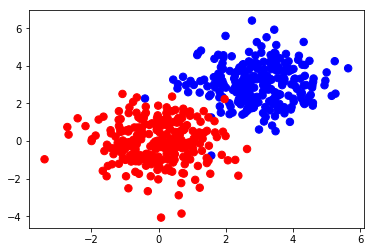

In [51]:
Test=clf_tree.predict(X)

#Result=[ Y[i]==Test[i] for i in range(len(Y)) ]
Result=[-1 if (Y[i]!=Test[i]) else Y[i] for i in range(len(Y)) ]

pltclr=lambda x : "Black" if x==-1 else ("Blue" if x==0 else "Red") 
plt.scatter(X[:, 0], X[:, 1], marker='o',s=55, c=[pltclr(i) for i in Result])
